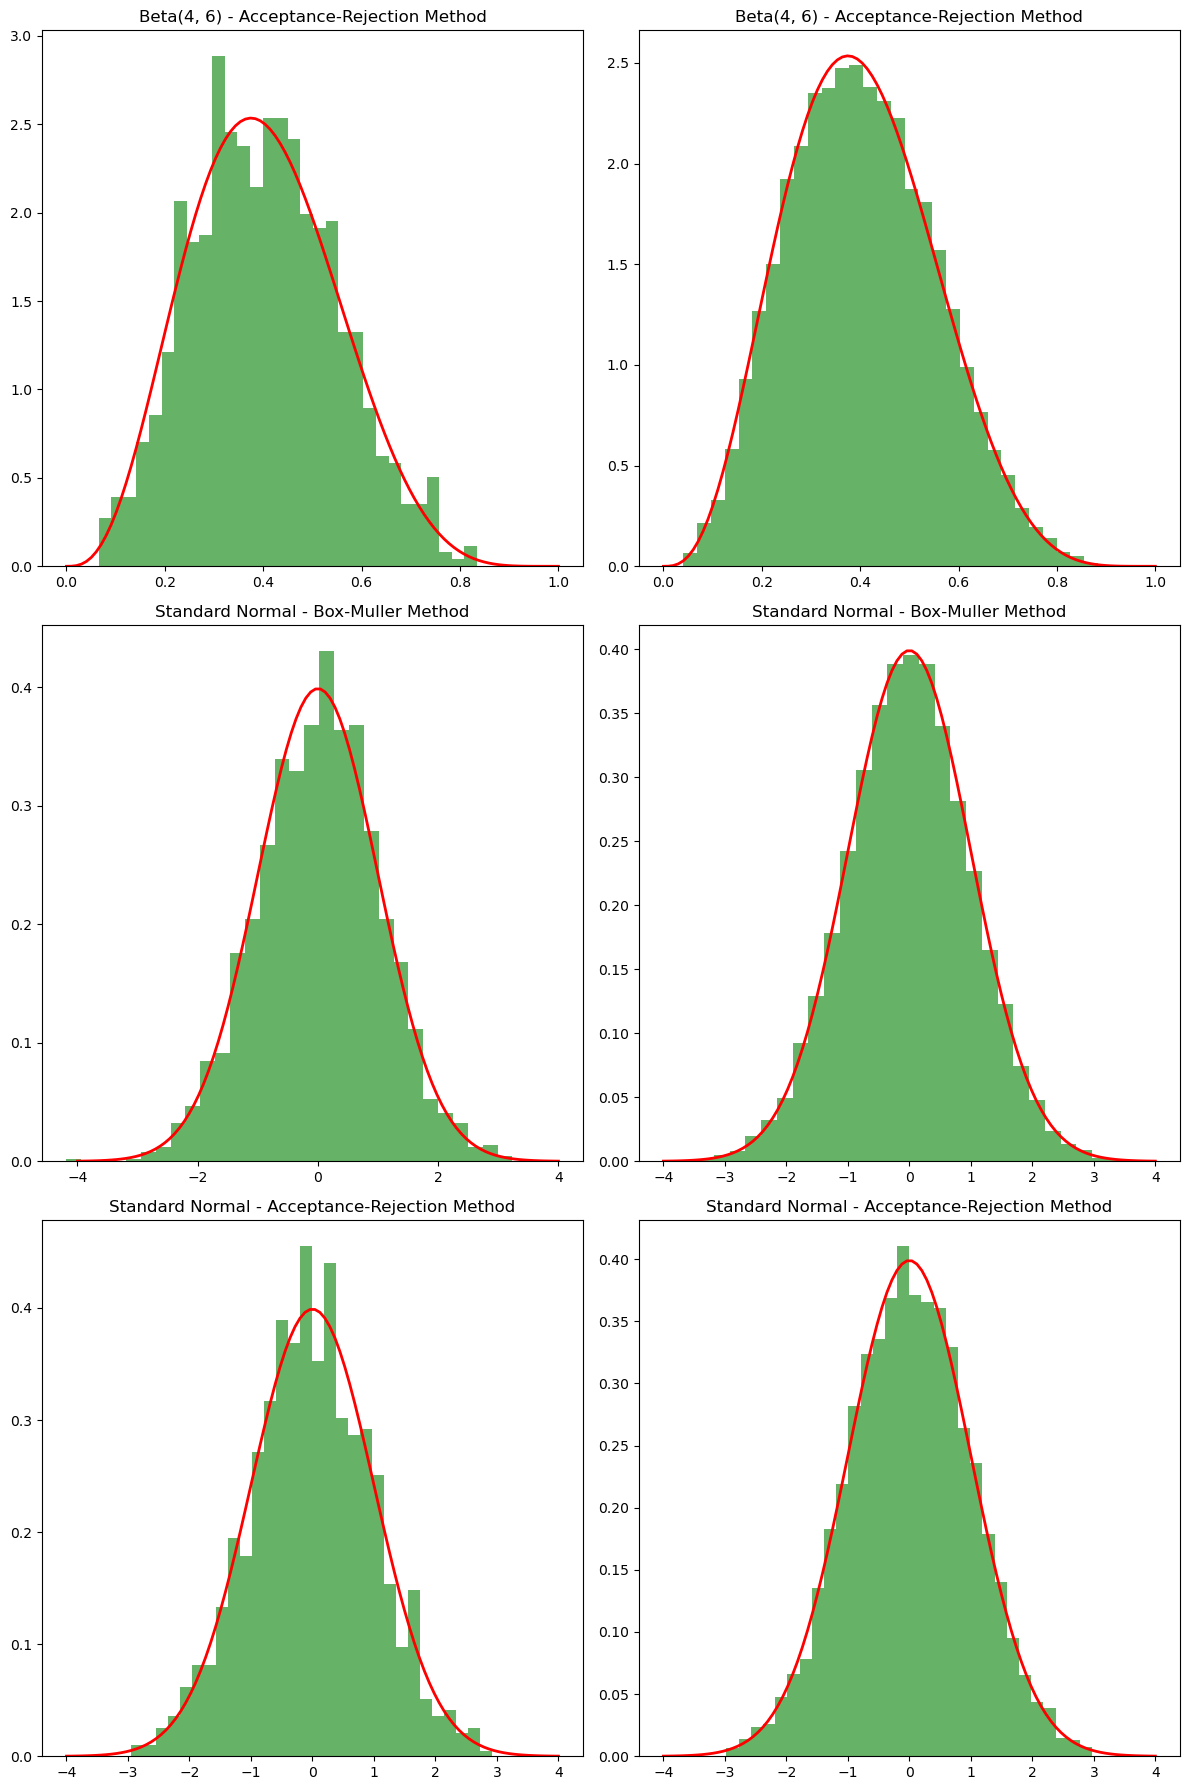

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

def beta_acceptance_rejection(alpha, beta, size):
    samples = []
    while len(samples) < size:
        u = np.random.uniform(0, 1)
        v = np.random.uniform(0, 1)
        x = u ** (1 / alpha)
        if v <= (1 - x) ** (beta - 1):
            samples.append(x)
    return np.array(samples)

def box_muller(size):
    u1 = np.random.uniform(0, 1, size)
    u2 = np.random.uniform(0, 1, size)
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return np.concatenate((z0, z1))

def normal_acceptance_rejection(size):
    samples = []
    while len(samples) < size:
        u = np.random.uniform(0, 1)
        v = np.random.uniform(-3, 3)
        if u <= np.exp(-0.5 * v ** 2):
            samples.append(v)
    return np.array(samples)

beta_samples1 = beta_acceptance_rejection(4, 6, 1000)
beta_samples2 = beta_acceptance_rejection(4, 6, 10000)
box_muller_samples1 = box_muller(1000)
box_muller_samples2 = box_muller(10000)
normal_ar_samples1 = normal_acceptance_rejection(1000)
normal_ar_samples2 = normal_acceptance_rejection(10000)

fig, axs = plt.subplots(3, 2, figsize=(12, 18))

axs[0, 0].hist(beta_samples1, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(0, 1, 100)
axs[0, 0].plot(x, beta.pdf(x, 4, 6), 'r-', lw=2)
axs[0, 0].set_title('Beta(4, 6) - Acceptance-Rejection Method')

axs[0, 1].hist(beta_samples2, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(0, 1, 100)
axs[0, 1].plot(x, beta.pdf(x, 4, 6), 'r-', lw=2)
axs[0, 1].set_title('Beta(4, 6) - Acceptance-Rejection Method')

axs[1, 0].hist(box_muller_samples1, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 4, 100)
axs[1, 0].plot(x, norm.pdf(x), 'r-', lw=2)
axs[1, 0].set_title('Standard Normal - Box-Muller Method')

axs[1, 1].hist(box_muller_samples2, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 4, 100)
axs[1, 1].plot(x, norm.pdf(x), 'r-', lw=2)
axs[1, 1].set_title('Standard Normal - Box-Muller Method')

axs[2, 0].hist(normal_ar_samples1, bins=30, density=True, alpha=0.6, color='g')
axs[2, 0].plot(x, norm.pdf(x), 'r-', lw=2)
axs[2, 0].set_title('Standard Normal - Acceptance-Rejection Method')

axs[2, 1].hist(normal_ar_samples2, bins=30, density=True, alpha=0.6, color='g')
axs[2, 1].plot(x, norm.pdf(x), 'r-', lw=2)
axs[2, 1].set_title('Standard Normal - Acceptance-Rejection Method')

plt.tight_layout()
plt.show()

In terms of sampling Normal distribution, their variance are similar, while the sample eﬃciency of
BoxMuller is higher with also higher running speed.  

# Box-Muller:  
## Pros:  
It is easy to implement, and the method only uses Unif(0, 1) as the basis data sample, which
is simple to sample.  
## Cons:  
Only the standard normal distribution can be sampled by this method.  

# Acceptance-Rejection:
## Pros:  
It can sample many kinds of probability distribution including many distributions that is
diﬃcult to sample directly.  

## Cons:  
The domain of function g(x) must cover the domain of function f (x). If c is closed to 1, the
basis distribution g is still diﬃcult to sample; while if c is closed to 0, the probability of acceptance
success will be small, which will cause low eﬃciency.